In [9]:
import os
import sys
import json
from copy import deepcopy
from tqdm.notebook import tqdm
import pandas as pd
import seaborn as sns

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [10]:
!ls data_files/store_model_scores/sorted

test_set_q_candidate_model_scores_0.json
test_set_q_candidate_model_scores_1.json
test_set_q_candidate_model_scores_2.json
test_set_q_candidate_model_scores_3.json


#### Load the sorted scores thing (assume zero-based numbeering)

In [11]:
INPUT_FILE_PATH="data_files/store_model_scores/sorted/"

In [12]:
file_idx=0

with open(INPUT_FILE_PATH+f"test_set_q_candidate_model_scores_{file_idx}.json",'r') as fd:
    df=json.load(fd)

df['440482']

In [13]:
def fetch_rank_of_duplicates(q_obj, model_idx):
    ranks=[]
    for curr_contender in q_obj['scores']:
        if curr_contender['candidate_qid'] not in q_obj['expected_questions']:
            continue
        ranks.append(curr_contender['rank'][model_idx])
    return ranks
        

In [14]:
def fetch_ranks_for_model(model_idx):
    lb_file_idx=0
    ub_file_idx=3
    curr_smai_q_id=-1
    x_c=[]
    y_c=[]
    for curr_file_id in range(lb_file_idx, ub_file_idx+1):
        with open(INPUT_FILE_PATH+f"test_set_q_candidate_model_scores_{curr_file_id}.json",'r') as fd:
            df=json.load(fd)
        print("file opened with id ", curr_file_id)
        for curr_dup_q, curr_val in tqdm(df.items()):
            curr_smai_q_id+=1
            dups_rank=fetch_rank_of_duplicates(curr_val, model_idx)
            num_dups=len(dups_rank)
            y_c.extend(dups_rank)
            x_c.extend([curr_smai_q_id]*num_dups)
    return x_c, y_c

In [15]:
THRESHOLD=20
num_models=6

file opened with id  0



file opened with id  1



file opened with id  2



file opened with id  3


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


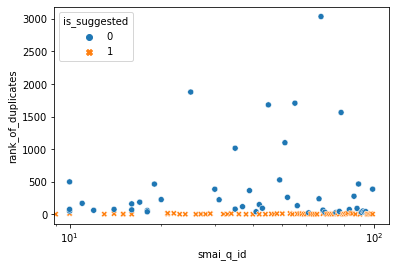

In [17]:
for curr_model_idx in range(1):
    #x_c, y_c=fetch_ranks_for_model(curr_model_idx)
    #is_suggested=[1 if rank<THRESHOLD else 0 for rank in y_c ]
    #dups_dict={"rank_of_duplicates":y_c, "smai_q_id":x_c, "is_suggested":is_suggested}
    #q_df=pd.DataFrame(dups_dict)
    q_df=q_df[q_df['rank_of_duplicates']<5000]
    sns.scatterplot(data=q_df, x="smai_q_id", y="rank_of_duplicates", hue="is_suggested", style="is_suggested")
    sns.kdeplot(data=q_df, x="rank_of_duplicates", log_scale=True)

    

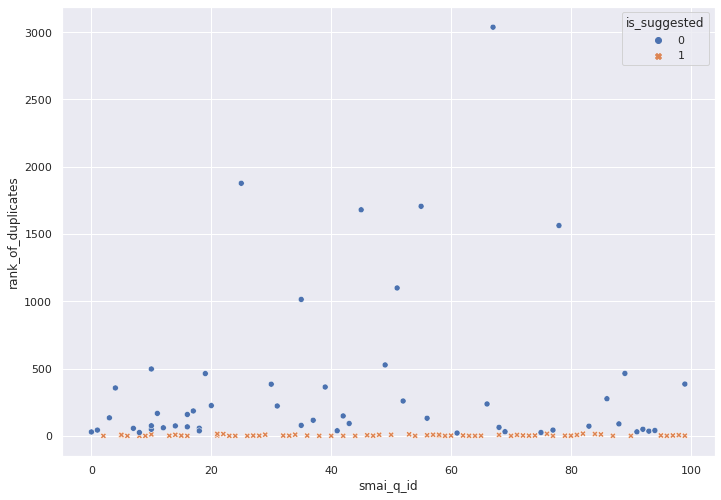

In [28]:
sns.scatterplot(data=q_df, x="smai_q_id", y="rank_of_duplicates", hue="is_suggested", style="is_suggested")


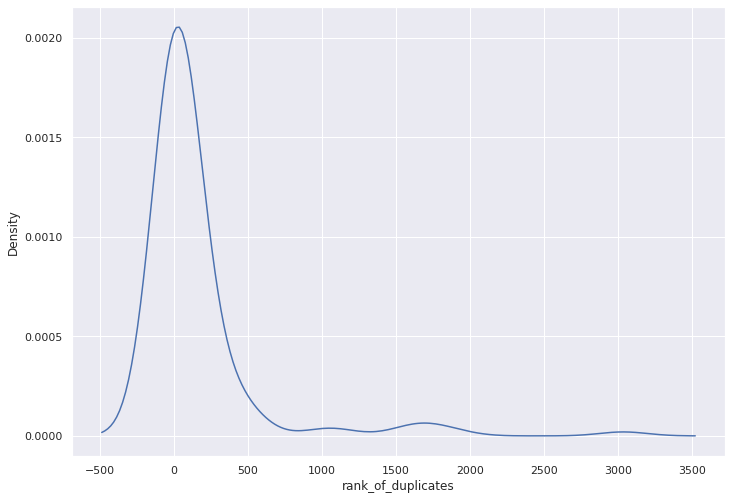

In [29]:
sns.kdeplot(data=q_df, x="rank_of_duplicates")

In [30]:
sorted(q_df['rank_of_duplicates'])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 11,
 11,
 12,
 14,
 14,
 15,
 15,
 16,
 21,
 25,
 25,
 29,
 30,
 31,
 35,
 37,
 38,
 40,
 43,
 43,
 49,
 49,
 56,
 57,
 60,
 63,
 67,
 72,
 74,
 75,
 78,
 89,
 92,
 116,
 131,
 134,
 148,
 159,
 167,
 185,
 222,
 225,
 237,
 259,
 276,
 356,
 363,
 384,
 385,
 463,
 464,
 497,
 527,
 1014,
 1099,
 1563,
 1680,
 1706,
 1877,
 3037]

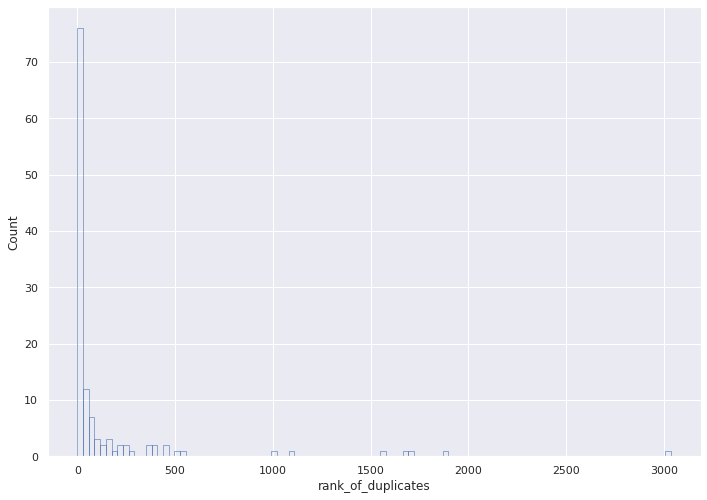

In [31]:
sns.histplot(data=q_df, x="rank_of_duplicates",fill=False)

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


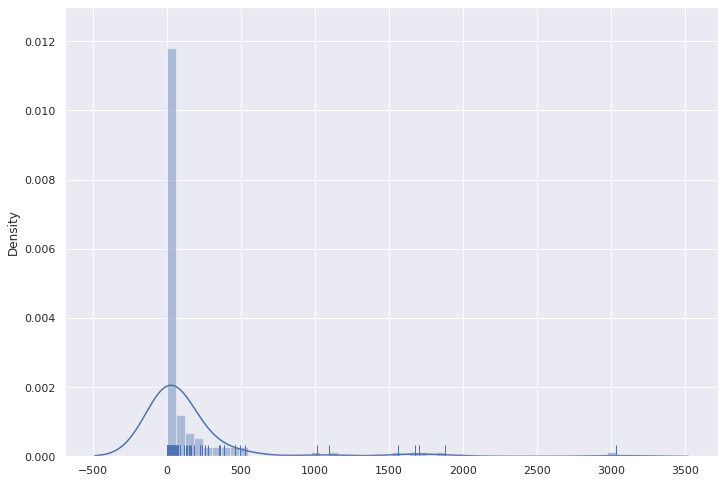

In [32]:
sns.distplot(x=q_df["rank_of_duplicates"], rug=True)